# 1 - Perkenalan

Nama : Nurul Izzah

Batch : 18

Dataset : ParagonCorp's Dataset

Objective : forecast Quantity in the next period

# 2 - Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
import tensorflow as tf
import pickle
import json
import pickle
import json
!pip install feature-engine

from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from feature_engine.outliers import Winsorizer
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.4/319.4 kB 5.9 MB/s eta 0:00:00


# 3 - Data Loading

In [2]:
#import data from github
df = pd.read_csv ('https://raw.githubusercontent.com/ardhiraka/talent_fair_sample_challenge/main/datasets/sample_dataset_timeseries_noarea.csv')
df

,week_number,week_start_date,week_end_date,product_item,quantity
0,2021-52,2021-12-27,2022-01-02,0073377087c7ddace313ff829cd7b0b3,41
1,2021-52,2021-12-27,2022-01-02,012d2bb142b2d5e57330acbfd8e9ac52,430
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4
3,2021-52,2021-12-27,2022-01-02,019502f6d13e383caa9b9673bf1302f8,148
4,2021-52,2021-12-27,2022-01-02,01e7ca6d4e21badc1d4225b6b2c7bd9e,119
...,...,...,...,...,...
102728,2023-14,2023-04-03,2023-04-09,ff3890faa80ff425ae906e27bbc50bc6,907
102729,2023-14,2023-04-03,2023-04-09,ff4b0f3b9c78c91510a4e3920fbc5090,81
102730,2023-14,2023-04-03,2023-04-09,ff9d05a4d6f922b3ab1653f58165b8ce,16
102731,2023-14,2023-04-03,2023-04-09,ffbd6f1d884056a4f622d54ae79e5a14,42920


In [3]:
# duplikat data agar tidak kehilangan data awal
df_copy = df.copy()

In [ ]:
# melihat tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   week_number      102733 non-null  object
 1   week_start_date  102733 non-null  object
 2   week_end_date    102733 non-null  object
 3   product_item     102731 non-null  object
 4   quantity         102733 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.9+ MB


- Data terdiri dari 5 kolom dan 102733 baris

- Kolom "week_number", "week_start_date", dan "week_end_date" memiliki tipe data objek, sedangkan kolom "product_item" memiliki tipe data objek dan mengandung 2 missing value
- Kolom "quantity" memiliki tipe data integer
- Semua data tidak memiliki missing value, hanya product_item yg memiliki missing value

In [ ]:
# 10 data teratas
df.head(10)

,week_number,week_start_date,week_end_date,product_item,quantity
0,2021-52,2021-12-27,2022-01-02,0073377087c7ddace313ff829cd7b0b3,41
1,2021-52,2021-12-27,2022-01-02,012d2bb142b2d5e57330acbfd8e9ac52,430
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4
3,2021-52,2021-12-27,2022-01-02,019502f6d13e383caa9b9673bf1302f8,148
4,2021-52,2021-12-27,2022-01-02,01e7ca6d4e21badc1d4225b6b2c7bd9e,119
5,2021-52,2021-12-27,2022-01-02,01fa9977e1c61ce5542c6f0c2a1b2895,2
6,2021-52,2021-12-27,2022-01-02,043e6d02d98b44c40645c8a22812fe88,44
7,2021-52,2021-12-27,2022-01-02,0512efdcc99fa4d57c42cd2cf6c73633,165
8,2021-52,2021-12-27,2022-01-02,05262da388ab82c51c48c9535bc8b121,41
9,2021-52,2021-12-27,2022-01-02,058cc2cecb91d10e901a597e67532619,383


In [ ]:
# 10 data terbawah
df.tail(10)

,week_number,week_start_date,week_end_date,product_item,quantity
102723,2023-14,2023-04-03,2023-04-09,fe88080dd6a4387f1035c908d3ec26a5,4131
102724,2023-14,2023-04-03,2023-04-09,fe92a95f45cfe213258cd8da682cd1a3,9
102725,2023-14,2023-04-03,2023-04-09,fed98e52dd33638523d6028c19c3a103,21872
102726,2023-14,2023-04-03,2023-04-09,fef44d74d0c1e1d0d9f1c584391eeb60,75
102727,2023-14,2023-04-03,2023-04-09,ff24eb021c575c9a1dc709c3f8d6631a,436
102728,2023-14,2023-04-03,2023-04-09,ff3890faa80ff425ae906e27bbc50bc6,907
102729,2023-14,2023-04-03,2023-04-09,ff4b0f3b9c78c91510a4e3920fbc5090,81
102730,2023-14,2023-04-03,2023-04-09,ff9d05a4d6f922b3ab1653f58165b8ce,16
102731,2023-14,2023-04-03,2023-04-09,ffbd6f1d884056a4f622d54ae79e5a14,42920
102732,2023-14,2023-04-03,2023-04-09,fff18f7c705e729746515e2053dee64b,53


# 4 - Exploratory Data Analysis (EDA)

> Melihat jumlah produk yang terjual dari waktu ke waktu

In [4]:
# convert kolom week_start_date dan week_end_date
df['week_start_date'] = pd.to_datetime(df['week_start_date'])
df['week_end_date'] = pd.to_datetime(df['week_end_date'])

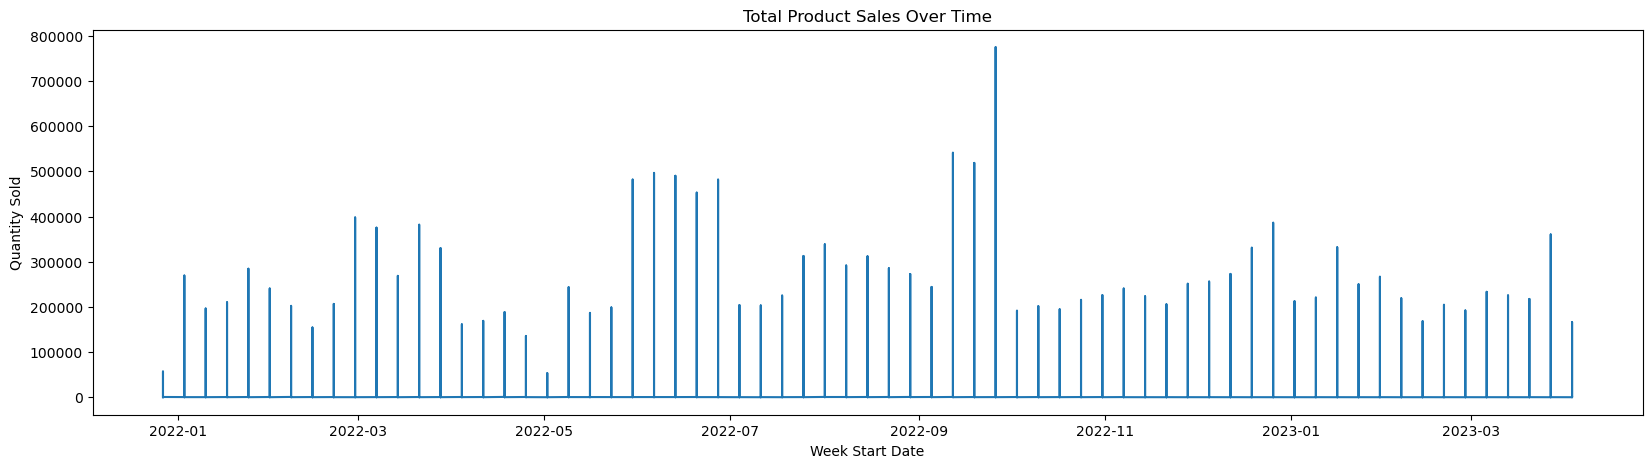

In [ ]:
# membuat line chart total untuk melihat penjualan produk
plt.figure(figsize=(20,5))
plt.plot(df['week_start_date'], df['quantity'])
plt.title('Total Product Sales Over Time')
plt.xlabel('Week Start Date')
plt.ylabel('Quantity Sold')
plt.show()

pada bulan september 2022, terjadi peningkatan penjualan tertinggi dan terjadi peningkatan selanjutnya dibulan juni 2022

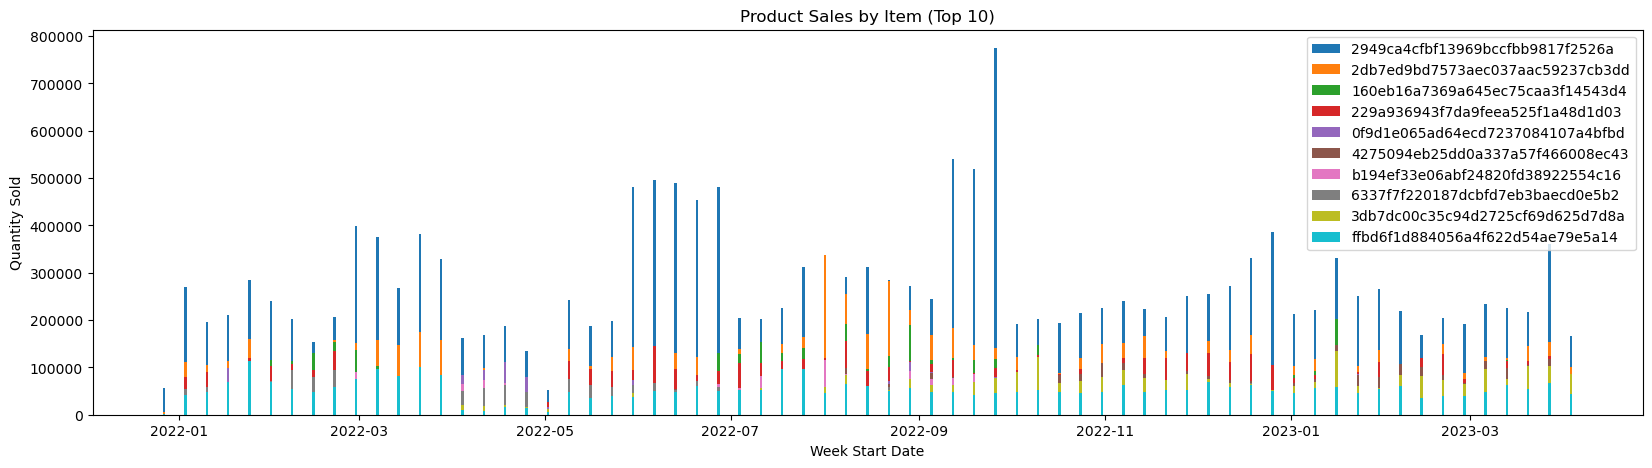

In [ ]:
# 10 penjualan produk
top_items = df.groupby('product_item')['quantity'].sum().nlargest(10).index.tolist()
plt.figure(figsize=(20,5))
for item in top_items:
    item_df = df[df['product_item'] == item]
    plt.bar(item_df['week_start_date'], item_df['quantity'], label=item)
plt.title('Product Sales by Item (Top 10)')
plt.xlabel('Week Start Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.show()

In [ ]:
# jumlah total yang terjual untuk setiap item produk teratas
top_items = df.groupby('product_item')['quantity'].sum().nlargest(10).reset_index()
for i, row in top_items.iterrows():
    print(f"{i+1}. {row['product_item']}: {row['quantity']} units sold")

1. 2949ca4cfbf13969bccfbb9817f2526a: 18206376 units sold
2. 2db7ed9bd7573aec037aac59237cb3dd: 9122007 units sold
3. 160eb16a7369a645ec75caa3f14543d4: 6771207 units sold
4. 229a936943f7da9feea525f1a48d1d03: 6658518 units sold
5. 0f9d1e065ad64ecd7237084107a4bfbd: 4202082 units sold
6. 4275094eb25dd0a337a57f466008ec43: 4096482 units sold
7. b194ef33e06abf24820fd38922554c16: 3681026 units sold
8. 6337f7f220187dcbfd7eb3baecd0e5b2: 3571331 units sold
9. 3db7dc00c35c94d2725cf69d625d7d8a: 3546596 units sold
10. ffbd6f1d884056a4f622d54ae79e5a14: 3532900 units sold


- Produk dengan ID 2949ca4cfbf13969bccfbb9817f2526a memiliki jumlah penjualan terbanyak sebesar 18206376 unit.

- Produk dengan ID 2db7ed9bd7573aec037aac59237cb3dd memiliki jumlah penjualan sebesar 9122007 unit, yang menempati urutan kedua.

- Produk dengan ID 160eb16a7369a645ec75caa3f14543d4 memiliki jumlah penjualan sebesar 6771207 unit, yang menempati urutan ketiga.

> Melihat jumlah total produk yg terjual

In [ ]:
# deskriptif analyst kolom quantity
quantity_stats = df['quantity'].describe()

In [ ]:
#menghitung total produk terjual
total_quantity = df['quantity'].sum()

print("Descriptive Statistics for Quantity:")
print(quantity_stats)
print("\nTotal Quantity Sold:", total_quantity)

Descriptive Statistics for Quantity:
count    102733.000000
mean       3191.562419
std       12074.631014
min           0.000000
25%          75.000000
50%         414.000000
75%        1890.000000
max      774732.000000
Name: quantity, dtype: float64

Total Quantity Sold: 327878782


- Terdapat 102733 transaksi yang tercatat pada data tersebut.

- Rata-rata jumlah produk yang terjual per transaksi adalah 3191.56 unit, dengan standar deviasi sebesar 12074.63 unit.

- Jumlah produk terjual minimal adalah 0 unit, sedangkan jumlah produk terjual maksimal mencapai 774732 unit.

- Kuartil pertama (Q1) pada jumlah produk terjual adalah 75 unit, median (Q2) adalah 414 unit, dan kuartil ketiga (Q3) adalah 1890 unit.

- Total jumlah produk yang terjual selama periode tersebut adalah 327878782 unit.

# 5 - Feature Engineering

## 5.1 - Data Cleaning

In [ ]:
# cek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   week_number      102733 non-null  object        
 1   week_start_date  102733 non-null  datetime64[ns]
 2   week_end_date    102733 non-null  datetime64[ns]
 3   product_item     102731 non-null  object        
 4   quantity         102733 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.9+ MB


In [ ]:
# deteksi missing value
df.isnull().sum()

week_number        0
week_start_date    0
week_end_date      0
product_item       2
quantity           0
dtype: int64

In [5]:
# Menghapus missing value pada kolom 'product_item'
df.dropna(subset=['product_item'], inplace=True)

In [ ]:
#melihat duplikasi data
df.duplicated().sum()

0

### 5.1.1 - Cardinality Check

In [ ]:
# memeriksa cardinality
print('Number of categories in the variable product_item     : {}'.format(len(df.product_item.unique())))

Number of categories in the variable product_item     : 2309


In [ ]:
#melihat nilai unik
df.product_item.unique()

array(['0073377087c7ddace313ff829cd7b0b3',
       '012d2bb142b2d5e57330acbfd8e9ac52',
       '0192926e33d1153b63511a5b83eca843', ...,
       'b86ac140782a3ec0662fc3a2b7c30590',
       'c26bb0ce75e31e6c29aae7056c8bbce6',
       'ff9d05a4d6f922b3ab1653f58165b8ce'], dtype=object)

In [6]:
#mengecek cardinality dr data product_item
cardinality = df['product_item'].value_counts().reset_index()
cardinality.columns = ['product_item', 'count']
print(cardinality)

                          product_item  count
0     0073377087c7ddace313ff829cd7b0b3     67
1     870b3ad8c41b746b29ba31f6e4040950     67
2     9264576b8833b892b34a39525bcdd271     67
3     921cfbd1930eeee6b82a7b053c4ed8dc     67
4     91f65f29b32c39788b4294cbe2be7024     67
...                                ...    ...
2304  d97d3a3e53124b6b1a8313403f54f6b8      1
2305  d963020bd8d76659c6768ad252be9629      1
2306  d4e90f2dcbcf53757d6bd1f3b6f368cb      1
2307  170ad92bf82a3509886ceb841cd6e3c3      1
2308  ff9d05a4d6f922b3ab1653f58165b8ce      1

[2309 rows x 2 columns]


In [ ]:
# Mengecek nilai 1
low_frequency = (cardinality['count'] == 1).sum()
print(low_frequency)

170


In [7]:
# Mengecek unique code yang muncul hanya 1-4 kali di data
to_drop = cardinality[cardinality['count'] == 1]['product_item'].tolist()
df = df.drop(df[df['product_item'].isin(to_drop)].index)

to_drop = cardinality[cardinality['count'] == 2]['product_item'].tolist()
df = df.drop(df[df['product_item'].isin(to_drop)].index)

to_drop = cardinality[cardinality['count'] == 3]['product_item'].tolist()
df = df.drop(df[df['product_item'].isin(to_drop)].index)

to_drop = cardinality[cardinality['count'] == 4]['product_item'].tolist()
df = df.drop(df[df['product_item'].isin(to_drop)].index)

# Mengganti unique code 
unique_codes = cardinality['product_item'].tolist()
unique_dict = {}
for i, code in enumerate(unique_codes):
    unique_dict[code] = f"product_{i+1}"
df['product_item'] = df['product_item'].replace(unique_dict)

In [ ]:
#mengecek cardinality dr data product_item
cardinality = df['product_item'].value_counts().reset_index()
cardinality.columns = ['product_item', 'count']
print(cardinality)

      product_item  count
0        product_1     67
1       product_30     67
2       product_33     67
3       product_34     67
4       product_35     67
...            ...    ...
1979  product_1967      5
1980  product_1970      5
1981  product_1955      5
1982  product_1956      5
1983  product_1975      5

[1984 rows x 2 columns]


In [ ]:
# mendefinisikan list product_item
product_items = df['product_item'].unique()

In [ ]:
# memperoleh tanggal terakhir dalam dataset
last_date = df['week_start_date'].max()

In [ ]:
# membuat list tanggal awal dari masing-masing 4 bulan terakhir
start_dates = pd.date_range(end=last_date, periods=4, freq='MS').strftime('%Y-%m-%d')

In [ ]:
# melakukan seasonal decomposition pada data untuk setiap 4 bulan terakhir per product_item
for product_item in product_items:
    for i in range(4):
        start_date = start_dates[i]
        end_date = pd.to_datetime(start_date) + pd.DateOffset(months=4) - pd.DateOffset(days=1)
        df_4month = df[(df['product_item'] == product_item) & (df['week_start_date'] >= start_date) & (df['week_start_date'] <= end_date)]
        n_observations = len(df_4month)
        if n_observations < 6:
            period = 1
        elif n_observations < 9:
            period = 2
        else:
            period = 3
        if period == 1 and n_observations < 2:
            continue  # skip jika jumlah pengamatan kurang dari 2
        elif period == 2 and n_observations < 8:
            continue  # skip jika jumlah pengamatan kurang dari 8
        elif period == 3 and n_observations < 14:
            continue  # skip jika jumlah pengamatan kurang dari 14
        result_4month = seasonal_decompose(df_4month['quantity'], model='additive', period=period)

        plt.figure(figsize=(12, 8))
        plt.subplot(411)
        plt.plot(df_4month['quantity'], label='Observed')
        plt.legend(loc='best')

        plt.subplot(412)
        plt.plot(result_4month.trend, label='Trend')
        plt.legend(loc='best')

        plt.subplot(413)
        plt.plot(result_4month.seasonal,label='Seasonality')
        plt.legend(loc='best')

        plt.subplot(414)
        plt.plot(result_4month.resid, label='Residuals')
        plt.legend(loc='best')

        plt.suptitle(f"Seasonal Decomposition for {start_date} to {end_date} ({product_item})")
        plt.tight_layout()
        
        # menyimpan grafik ke dalam file dengan nama berdasarkan product_item dan tanggal
        plt.savefig(f"{product_item}_{start_date}.png")
        
        # menghapus grafik dari tampilan
        plt.close()


pada keseluruhan grafik, terdapat perbedaan pola pada masing - masing produk

## 5.2 Feature Scaling

In [8]:
# Scaling data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df['quantity'].values.reshape(-1, 1))

# mengubah hasil scaling ke dataframe
df['quantity'] = data_scaled

## 5.3 - Handling Outlier

In [9]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

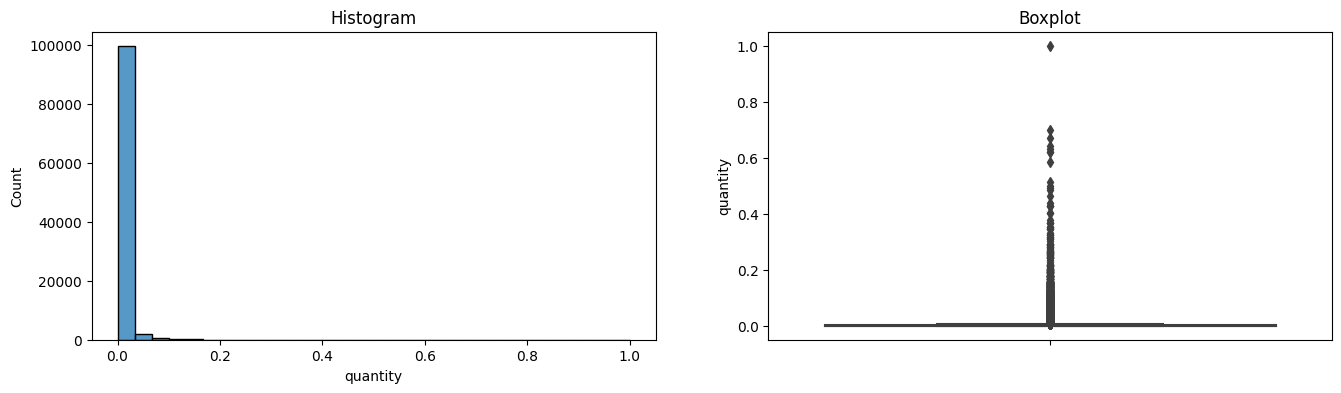


Skewness Value :  16.25999357477541


In [ ]:
#melihat distribusi data dan outlier kolom quantity
diagnostic_plots(df, 'quantity')
print('\nSkewness Value : ', df['quantity'].skew())

dari visualisasi tersebut, dapat disimpulkan kalau datanya berdistribusi sangat skew karena berpusat disebelah kiri

### 5.3.1 - Outlier detection for skewed variables

In [10]:
#mendeteksi nilai outlier dari distribusi tidak normal atau skew
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [11]:
#mendeteksi outlier dari kolom quantity
upper_boundary, lower_boundary = find_skewed_boundaries(df, 'quantity', 3)
upper_boundary, lower_boundary

(0.009528456291982259, -0.0069701522591037925)

In [12]:
outlier = df[(df['quantity'] <= lower_boundary) | (df['quantity'] >= upper_boundary)]

print('percentage: ', len(outlier)/df.shape[0] * 100, '%')

percentage:  8.806823746009362 %


karena masih terdapat outlier pada kolom quantity, maka akan digunakan winsorizer untuk menghandle outlier

### 5.3.2 - Handling Outlier for skewed variables using winsorizing

Alasan menggunakan Winsorizing adalah untuk mempertahankan informasi yang terkandung dalam dataset dan mengurangi pengaruh outliers terhadap analisis atau model

In [13]:
#groupping data
outlier_df = df[['quantity']]
outlier_df.head()

,quantity
0,0.000053
1,0.000555
2,0.000005
3,0.000191
4,0.000154


In [14]:
#menggunakan winsorizer
for col in outlier_df:
    winsoriserdf = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['quantity'])

winsoriserdf.fit(outlier_df)
outlierdf_df = winsoriserdf.transform(outlier_df)

In [15]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', winsoriserdf.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', winsoriserdf.right_tail_caps_)

Left Tail Caps  :  {'quantity': -0.0034347361410139244}
Right Tail Caps :  {'quantity': 0.005993040173892391}


quantity - Before Capping


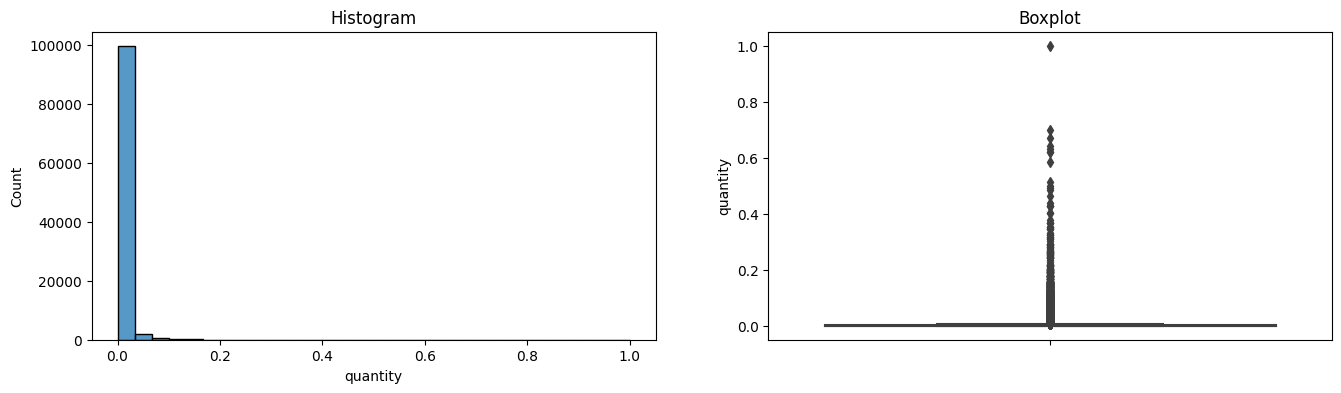


 quantity - After Capping


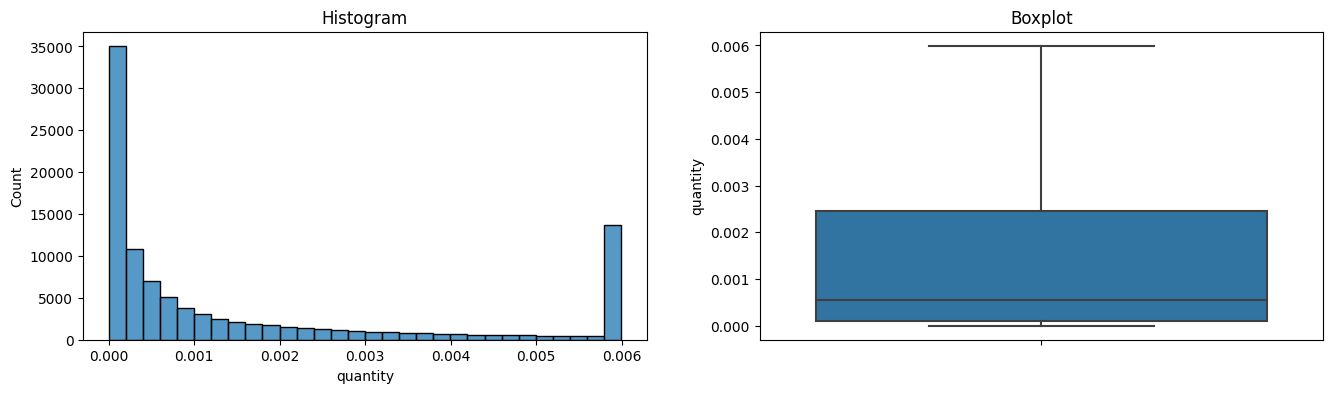

In [ ]:
#find outliers in quantity
print('quantity - Before Capping')
diagnostic_plots(outlier_df, 'quantity')
print('\n quantity - After Capping')
diagnostic_plots(outlierdf_df, 'quantity')

setelah di winsorizer terlihat sudah tidak ada lagi outlier dalam kolom quantity

In [16]:
# fit transform ke data train
df = winsoriserdf.fit_transform(df)

## 5.4 Split data

In [17]:
# Menghapus 'product_' dari setiap nilai dalam kolom product_item
df['product_item'] = df['product_item'].str.replace('product_', '') 
df['product_item'] = df['product_item'].astype(int)

In [18]:
# Group data by week and product item
df_grouped = df.groupby(['week_start_date', 'week_end_date', 'product_item']).agg({'quantity': 'sum'}).reset_index()

In [19]:
# Extract week number from week_start_date column
df_grouped['week_number'] = df_grouped['week_start_date'].dt.week

<ipython-input-19-0a10a7da649c>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_grouped['week_number'] = df_grouped['week_start_date'].dt.week


In [20]:
# Convert week_number column to integer
df_grouped['week_number'] = df_grouped['week_number'].astype(int)

In [21]:
# Split data into train, validation, and test sets
train_data, validation_data = train_test_split(df_grouped, test_size=0.2, shuffle=False)
validation_data, test_data = train_test_split(validation_data, test_size=0.2, shuffle=False)


In [22]:
# Define input and output variables for LSTM
X_train = train_data[['week_number', 'product_item', 'quantity']].values
y_train = train_data['quantity'].values

X_val = validation_data[['week_number', 'product_item', 'quantity']].values
y_val = validation_data['quantity'].values

X_test = test_data[['week_number', 'product_item', 'quantity']].values
y_test = test_data['quantity'].values

In [23]:
# Define window size
window_size = 7

# Define function to create input windows
def create_input_windows(X, y, window_size):
    X_windowed = []
    y_windowed = []
    for i in range(window_size, len(X)):
        X_windowed.append(X[i-window_size:i])
        y_windowed.append(y[i-window_size:i+1])
    return np.array(X_windowed), np.array(y_windowed)

In [24]:
# Create input windows for train, validation, and test sets
X_train_windowed, y_train_windowed = create_input_windows(X_train, y_train, window_size=7)
X_val_windowed, y_val_windowed = create_input_windows(X_val, y_val, window_size=7)
X_test_windowed, y_test_windowed = create_input_windows(X_test, y_test, window_size=7)

In [25]:
# Change input shape to (window_size, jumlah_fitur) 
X_train_windowed = X_train_windowed.reshape(X_train_windowed.shape[0], window_size, X_train_windowed.shape[2])
X_val_windowed = X_val_windowed.reshape(X_val_windowed.shape[0], window_size, X_val_windowed.shape[2])
X_test_windowed = X_test_windowed.reshape(X_test_windowed.shape[0], window_size, X_test_windowed.shape[2])

# 6 - Model Definiton

- menggunakan model Neural Network LSTM karena karena dapat menyimpan informasi pada setiap waktu sebelumnya dengan menggunakan "cell state" yang memungkinkan informasi lama dipertahankan dan dipakai pada waktu yang akan datang dan juga dapat mengatasi permasalahan yang muncul pada data time series seperti efek musiman, tren, dan anomali

- menggunakan earlystop pada saat model improvement bertujuan untuk mencegah overfitting dan dan meningkatkan kemampuan model untuk melakukan generalisasi pada data uji juga bisa mengurangi waktu komputasi karena menghentikan pelatihan pada saat performa pada data validasi sudah tidak meningkat lagi

- menggunakan hyperparmeter tuning untuk mencari kombinasi hyperparameter yang paling baik



# 7 - Model Training

## 7.1 Sequential API

In [ ]:
# Create the LSTM model
model_seq = Sequential()
model_seq.add(LSTM(50, input_shape=(window_size, X_train_windowed.shape[2])))
model_seq.add(Dense(1))

# Compile the model
model_seq.compile(optimizer='adam', loss='mse')
model_seq.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10800     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,851
Trainable params: 10,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
history_seq = model_seq.fit(X_train_windowed, y_train_windowed, validation_data=(X_val_windowed, y_val_windowed), epochs=50, batch_size=32)

Epoch 1/50
2553/2553 [==============================] - 21s 5ms/step - loss: 4.4292e-04 - val_loss: 1.4304e-05
Epoch 2/50
2553/2553 [==============================] - 12s 5ms/step - loss: 2.5132e-05 - val_loss: 7.0531e-06
Epoch 3/50
2553/2553 [==============================] - 15s 6ms/step - loss: 1.6892e-05 - val_loss: 1.4451e-05
Epoch 4/50
2553/2553 [==============================] - 12s 5ms/step - loss: 1.8609e-05 - val_loss: 2.0503e-05
Epoch 5/50
2553/2553 [==============================] - 12s 5ms/step - loss: 1.0083e-05 - val_loss: 4.5194e-06
Epoch 6/50
2553/2553 [==============================] - 12s 5ms/step - loss: 1.0533e-05 - val_loss: 4.7116e-06
Epoch 7/50
2553/2553 [==============================] - 12s 5ms/step - loss: 9.1902e-06 - val_loss: 5.3491e-06
Epoch 8/50
2553/2553 [==============================] - 12s 5ms/step - loss: 7.8655e-06 - val_loss: 5.8410e-06
Epoch 9/50
2553/2553 [==============================] - 12s 5ms/step - loss: 5.8899e-06 - val_loss: 3.5530e-06
E

## 7.2 Functional API

In [ ]:
# Create functional model
inputs = Input(shape=(window_size, X_train_windowed.shape[2]))
lstm1 = LSTM(50, activation='relu')(inputs)
output = Dense(1)(lstm1)
model_func = Model(inputs=inputs, outputs=output)
model_func.compile(optimizer='adam', loss='mse')
model_func.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 7, 3)]            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)                10800     
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,851
Trainable params: 10,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
history_func = model_func.fit(X_train_windowed, y_train_windowed, epochs=50, batch_size=32, validation_data=(X_val_windowed, y_val_windowed))

Epoch 1/50
2553/2553 [==============================] - 58s 22ms/step - loss: 18.0033 - val_loss: 0.1502
Epoch 2/50
2553/2553 [==============================] - 41s 16ms/step - loss: 0.0468 - val_loss: 0.0114
Epoch 3/50
2553/2553 [==============================] - 52s 21ms/step - loss: 0.2097 - val_loss: 0.0038
Epoch 4/50
2553/2553 [==============================] - 49s 19ms/step - loss: 0.0185 - val_loss: 0.0379
Epoch 5/50
2553/2553 [==============================] - 42s 17ms/step - loss: 0.0760 - val_loss: 0.0162
Epoch 6/50
2553/2553 [==============================] - 43s 17ms/step - loss: 0.0109 - val_loss: 5.8830e-04
Epoch 7/50
2553/2553 [==============================] - 56s 22ms/step - loss: 0.0104 - val_loss: 0.0043
Epoch 8/50
2553/2553 [==============================] - 43s 17ms/step - loss: 0.0045 - val_loss: 0.0102
Epoch 9/50
2553/2553 [==============================] - 55s 22ms/step - loss: 0.0032 - val_loss: 6.8067e-05
Epoch 10/50
2553/2553 [==============================] 

# 8 - Model Evaluation

## 8.1 - Sequential API

In [ ]:
# Create DataFrame
history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,val_loss
0,0.000443,0.000014
1,0.000025,0.000007
2,0.000017,0.000014
3,0.000019,0.000021
4,0.000010,0.000005
5,0.000011,0.000005
6,0.000009,0.000005
7,0.000008,0.000006
8,0.000006,0.000004
9,0.000007,0.000004


<Axes: >

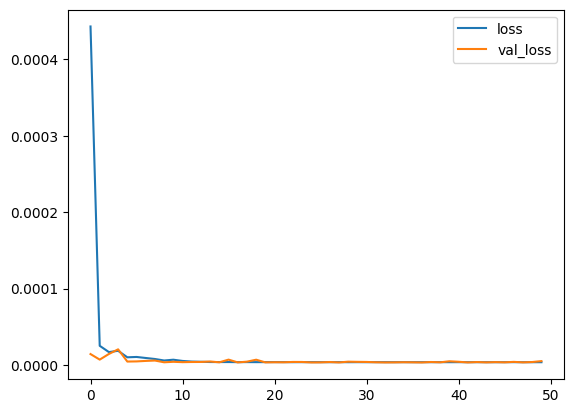

In [ ]:
# Plot Training Results
history_seq_df[['loss', 'val_loss']].plot()

In [ ]:
# Evaluasi model pada data test
test_loss = model_seq.evaluate(X_test_windowed, y_test_windowed)
print('Test loss (MSE):', test_loss)

128/128 [==============================] - 0s 2ms/step - loss: 5.1002e-06
Test loss (MSE): 5.100244379718788e-06


nilai score MSEnya bisa dikategorikan kecil yaitu 5.100 tetapi kalau dilihat dari grafiknya, terlihat garis cenderung monoton

## 8.2 - Functional API

In [ ]:
# Create DataFrame
history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,val_loss
0,18.003317,0.150178
1,0.046829,0.011411
2,0.209740,0.003843
3,0.018495,0.037946
4,0.076025,0.016235
5,0.010941,0.000588
6,0.010437,0.004340
7,0.004516,0.010239
8,0.003174,0.000068
9,0.004710,0.000633


<Axes: >

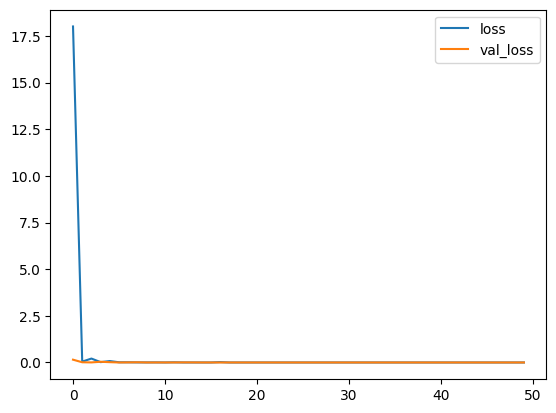

In [ ]:
# Plot Training Results
history_func_df[['loss', 'val_loss']].plot()

In [ ]:
# Evaluasi model pada data test
test_loss = model_func.evaluate(X_test_windowed, y_test_windowed)
print('Test loss (MSE):', test_loss)

128/128 [==============================] - 0s 3ms/step - loss: 3.5517e-06
Test loss (MSE): 3.5517116430128226e-06


Pada epoch terakhir, model mencapai loss sebesar 3.551.691, model cukup baik, walaupun goodfit, tapi garisnya cenderung monoton walaupun tergolong goodfit

# 9 - Model Improvement

## 9.1 - Sequential API

In [31]:
# create improvement sequential
model_sequential = Sequential()
model_sequential.add(LSTM(64, input_shape=(window_size, X_train_windowed.shape[2]), return_sequences=True))
model_sequential.add(LSTM(32, return_sequences=True))
model_sequential.add(LSTM(32))
model_sequential.add(Dense(1))
model_sequential.compile(optimizer='adam', loss='mse')
model_sequential.summary()

Model: "sequential_121"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_363 (LSTM)             (None, 7, 64)             17408     
                                                                 
 lstm_364 (LSTM)             (None, 7, 32)             12416     
                                                                 
 lstm_365 (LSTM)             (None, 32)                8320      
                                                                 
 dense_121 (Dense)           (None, 1)                 33        
                                                                 
Total params: 38,177
Trainable params: 38,177
Non-trainable params: 0
_________________________________________________________________


In [32]:
# define early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

In [33]:
# train the model with early stopping
history = model_sequential.fit(X_train_windowed, y_train_windowed, epochs=50, batch_size=32, validation_data=(X_val_windowed, y_val_windowed), callbacks=[early_stop])

Epoch 1/50
2553/2553 [==============================] - 25s 8ms/step - loss: 1.2104e-04 - val_loss: 3.5696e-06
Epoch 2/50
2553/2553 [==============================] - 18s 7ms/step - loss: 5.0089e-06 - val_loss: 3.4381e-06
Epoch 3/50
2553/2553 [==============================] - 20s 8ms/step - loss: 4.9861e-06 - val_loss: 3.4830e-06
Epoch 4/50
2553/2553 [==============================] - 19s 7ms/step - loss: 4.3755e-06 - val_loss: 4.5020e-06
Epoch 5/50
2553/2553 [==============================] - 19s 7ms/step - loss: 3.7915e-06 - val_loss: 4.2832e-06
Epoch 6/50
2553/2553 [==============================] - 19s 7ms/step - loss: 3.5939e-06 - val_loss: 3.4026e-06
Epoch 7/50
2553/2553 [==============================] - 19s 7ms/step - loss: 3.3865e-06 - val_loss: 3.5421e-06
Epoch 8/50
2553/2553 [==============================] - 19s 7ms/step - loss: 3.3392e-06 - val_loss: 3.3210e-06
Epoch 9/50
2553/2553 [==============================] - 19s 7ms/step - loss: 3.3151e-06 - val_loss: 3.4047e-06
E

In [34]:
# Create DataFrame
history_sequen = pd.DataFrame(history.history)
history_sequen

,loss,val_loss
0,0.000121,0.000004
1,0.000005,0.000003
2,0.000005,0.000003
3,0.000004,0.000005
4,0.000004,0.000004
5,0.000004,0.000003
6,0.000003,0.000004
7,0.000003,0.000003
8,0.000003,0.000003
9,0.000003,0.000004


<Axes: >

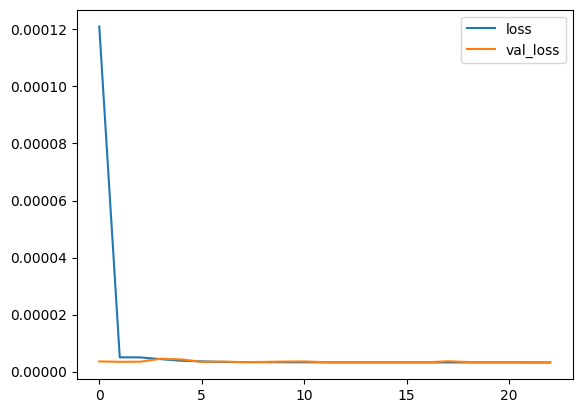

In [35]:
# Plot Training Results
history_sequen[['loss', 'val_loss']].plot()

In [36]:
# Evaluasi model pada data test
test_loss = model_sequential.evaluate(X_test_windowed, y_test_windowed)
print('Test loss (MSE):', test_loss)

128/128 [==============================] - 0s 3ms/step - loss: 3.5470e-06
Test loss (MSE): 3.547024562067236e-06


terlihat bahwa model Sequential setelah dilakukan improvement berhasil mengurangi nilai MSE pada data test dari 5.100 menjadi 3.742. Hal ini menunjukkan bahwa model Sequential setelah dilakukan improvement memberikan hasil yang lebih baik dibandingkan dengan model Sequential awal. bisa dikategorikan goodfit

## 9.2 Functional API

In [ ]:
# create improvement functional
inputs = Input(shape=(window_size, X_train_windowed.shape[2]))
x = LSTM(64, return_sequences=True)(inputs)
x = LSTM(32, return_sequences=True)(x)
x = LSTM(16)(x)
outputs = Dense(1)(x)

model_functional = Model(inputs=inputs, outputs=outputs)
model_functional.compile(optimizer='adam', loss='mse')
model_functional.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7, 3)]            0         
                                                                 
 lstm_3 (LSTM)               (None, 7, 64)             17408     
                                                                 
 lstm_4 (LSTM)               (None, 7, 32)             12416     
                                                                 
 lstm_5 (LSTM)               (None, 16)                3136      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 32,977
Trainable params: 32,977
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [ ]:
# train with early stop
history_functional = model_functional.fit(X_train_windowed, y_train_windowed, epochs=50, batch_size=32, validation_data=(X_val_windowed, y_val_windowed), callbacks=[early_stop])

Epoch 1/50
2553/2553 [==============================] - 25s 8ms/step - loss: 3.0760e-04 - val_loss: 3.7092e-06
Epoch 2/50
2553/2553 [==============================] - 19s 7ms/step - loss: 4.2060e-06 - val_loss: 3.9386e-06
Epoch 3/50
2553/2553 [==============================] - 20s 8ms/step - loss: 4.5268e-06 - val_loss: 3.9491e-06
Epoch 4/50
2553/2553 [==============================] - 19s 8ms/step - loss: 4.2723e-06 - val_loss: 3.4783e-06
Epoch 5/50
2553/2553 [==============================] - 18s 7ms/step - loss: 3.8631e-06 - val_loss: 3.4469e-06
Epoch 6/50
2553/2553 [==============================] - 19s 8ms/step - loss: 3.7265e-06 - val_loss: 3.7828e-06
Epoch 7/50
2553/2553 [==============================] - 19s 7ms/step - loss: 3.5454e-06 - val_loss: 4.5840e-06
Epoch 8/50
2553/2553 [==============================] - 19s 8ms/step - loss: 3.4706e-06 - val_loss: 3.9268e-06
Epoch 9/50
2553/2553 [==============================] - 19s 7ms/step - loss: 3.4196e-06 - val_loss: 3.3663e-06
E

In [ ]:
# Create DataFrame
history_funct = pd.DataFrame(history_functional.history)
history_funct

,loss,val_loss
0,0.000308,0.000004
1,0.000004,0.000004
2,0.000005,0.000004
3,0.000004,0.000003
4,0.000004,0.000003
5,0.000004,0.000004
6,0.000004,0.000005
7,0.000003,0.000004
8,0.000003,0.000003
9,0.000003,0.000003


<Axes: >

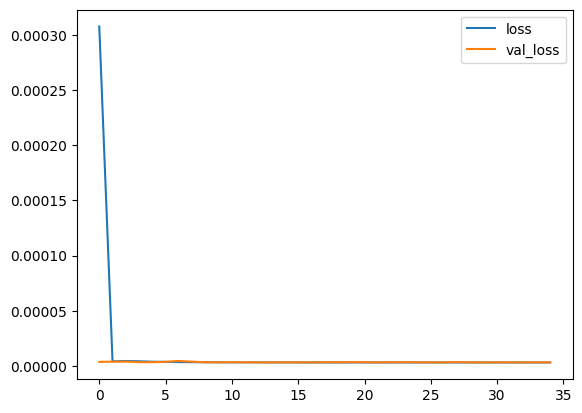

In [ ]:
# Plot Training Results
history_funct[['loss', 'val_loss']].plot()

In [ ]:
# Evaluasi model pada data test
test_loss = model_functional.evaluate(X_test_windowed, y_test_windowed)
print('Test loss (MSE):', test_loss)

128/128 [==============================] - 0s 3ms/step - loss: 3.6125e-06
Test loss (MSE): 3.612530917962431e-06


setelah dibandingkan dengan sebelum improvement, moddel functional sebelum improvement memiliki nilai score yg lebih kecil dari pada setelah improvement yaitu 3.551, dan walaupun dikategorikan goodtfit, tetapi polanya hanya garis lurus

setelah dibandingkan, model yg akan digunakan adalah model sequential

# 11 - Model Saving

In [37]:
# Save Model

with open('minmaxScaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)


model_sequential.save('timeseries_model.h5')

In [38]:
# Summary of Model Sequential

model_sequential.summary()

Model: "sequential_121"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_363 (LSTM)             (None, 7, 64)             17408     
                                                                 
 lstm_364 (LSTM)             (None, 7, 32)             12416     
                                                                 
 lstm_365 (LSTM)             (None, 32)                8320      
                                                                 
 dense_121 (Dense)           (None, 1)                 33        
                                                                 
Total params: 38,177
Trainable params: 38,177
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Freeze Model

model_sequential.trainable = False
model_sequential.summary()

Model: "sequential_121"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_363 (LSTM)             (None, 7, 64)             17408     
                                                                 
 lstm_364 (LSTM)             (None, 7, 32)             12416     
                                                                 
 lstm_365 (LSTM)             (None, 32)                8320      
                                                                 
 dense_121 (Dense)           (None, 1)                 33        
                                                                 
Total params: 38,177
Trainable params: 0
Non-trainable params: 38,177
_________________________________________________________________
